
## Interpolacion de O3 por AGEB

__Descripción:__

Se obtiene la contaminación de cada ageb mediante un nearest neighbours usando los datos de estaciones (Experimental)

__Input__

- contaminacion_entrenamiento.csv generado en **contaminacion_pro_hora.ipynb**

Responsable: Daniel Bustillos



In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import mean_squared_error
from IPython.display import display, Math, Latex
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

from sklearn.neighbors import KNeighborsRegressor

## Leemos el archivo de entrenamiento:

In [75]:
df_entrenamiento = pd.read_csv("../data/contaminacion/procesada/contaminacion_entrenamiento.csv")

In [76]:
df_entrenamiento.head()

,Unnamed: 0,id_station,hora,O3,PM10,PM2.5,Latitud,Longitud
0,0,ACO,0,18.281113,33.221709,NaN,19.635501,-98.912003
1,1,ACO,1,16.074662,35.012552,NaN,19.635501,-98.912003
2,2,ACO,7,4.617267,41.013466,NaN,19.635501,-98.912003
3,3,ACO,8,7.338105,46.672598,NaN,19.635501,-98.912003
4,4,ACO,9,16.397828,44.928114,NaN,19.635501,-98.912003


Parameter:

In [77]:
columnas_ubic = ["Longitud","Latitud"]

In [78]:
df_entrenamiento = df_entrenamiento[df_entrenamiento["hora"]==14]

In [79]:
features_train, features_test, labels_train, labels_test = train_test_split(df_entrenamiento[columnas_ubic], df_entrenamiento["O3"], 
                                                                            test_size=0.4, random_state=123)

In [80]:
n = features_train.shape[0]

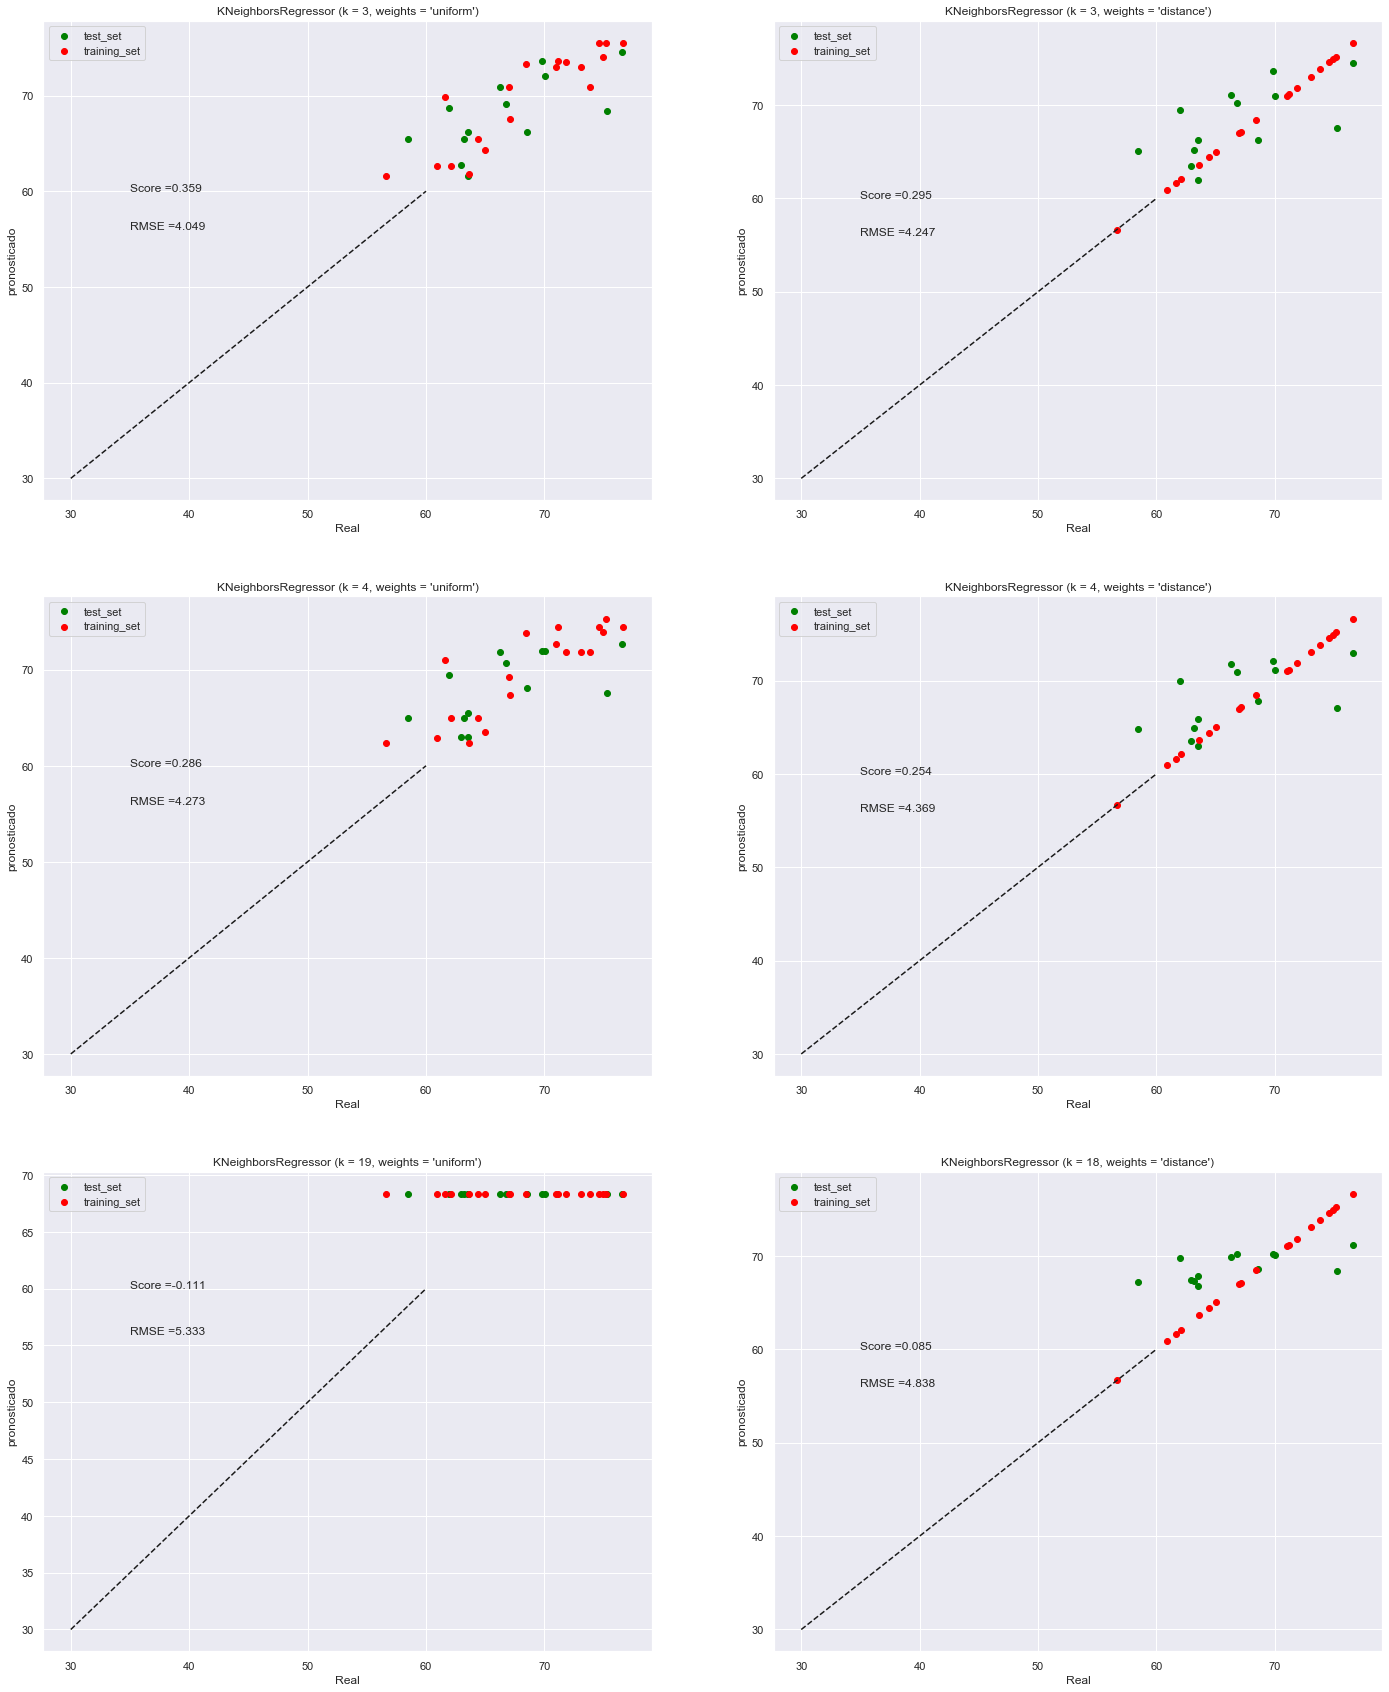

In [81]:
n = features_train.shape[0]
params = [{'weights': 'uniform', 'n_neighbors': 3},
          {'weights': 'distance', 'n_neighbors': 3},
          {'weights': 'uniform', 'n_neighbors': np.sqrt(n).astype(int)},
          {'weights': 'distance', 'n_neighbors': np.sqrt(n).astype(int)},
          {'weights': 'uniform', 'n_neighbors': n},
          {'weights': 'distance', 'n_neighbors': n-1}]

#plot_range = np.arange(features_train.min(), features_train.max(), 0.01)

for i, param in enumerate(params):
    model = KNeighborsRegressor(**params[i])
    model.fit(features_train, labels_train)

    pred = model.predict(features_test)
    # Sort values for plotting
    plt.subplot(3, 2, i + 1)
    plt.scatter(labels_test,pred, c='green', label='test_set')
    plt.scatter(labels_train,model.predict(features_train), c='red', label='training_set')
    
    score = round(model.score(features_test, labels_test),3)
    rmse = round(np.sqrt(mean_squared_error(labels_test, pred)),3)
    
    
    plt.plot([30,60],[30,60],color="k",linestyle='--')
    
    plt.annotate("Score ="+str(score), (35,59), xytext = (35, 59 + 1), 
                  horizontalalignment='left')
    plt.annotate("RMSE ="+str(rmse), (35,55), xytext = (35, 55 + 1), 
                  horizontalalignment='left')
    
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (params[i]['n_neighbors'], params[i]['weights']))
    plt.ylabel('pronosticado')
    plt.xlabel('Real')

plt.rcParams["figure.figsize"] = [24, 30]
    
plt.show()

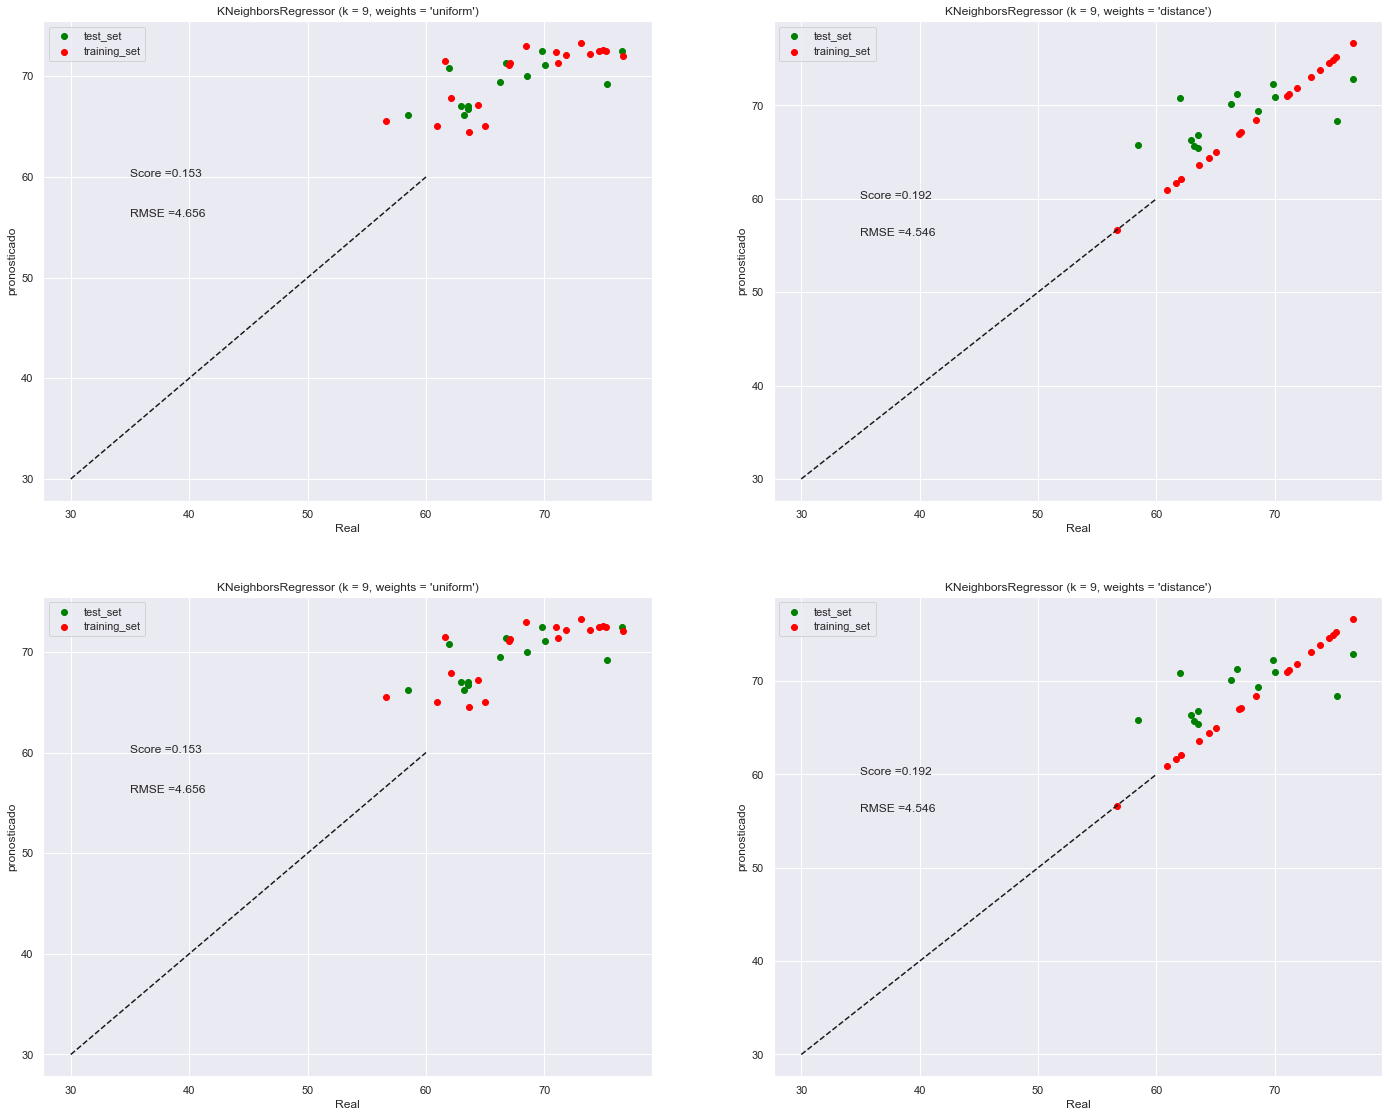

In [82]:
n = features_train.shape[0]
params = [{'weights': 'uniform', 'n_neighbors': 9,"algorithm":"brute"},
          {'weights': 'distance', 'n_neighbors': 9,"algorithm":"ball_tree"},
          {'weights': 'uniform', 'n_neighbors': 9,"algorithm":"brute"},
          {'weights': 'distance', 'n_neighbors': 9}]

#plot_range = np.arange(features_train.min(), features_train.max(), 0.01)

for i, param in enumerate(params):
    model = KNeighborsRegressor(**params[i])
    model.fit(features_train, labels_train)

    pred = model.predict(features_test)
    # Sort values for plotting
    plt.subplot(3, 2, i + 1)
    plt.scatter(labels_test,pred, c='green', label='test_set')
    plt.scatter(labels_train,model.predict(features_train), c='red', label='training_set')
    
    score = round(model.score(features_test, labels_test),3)
    rmse = round(np.sqrt(mean_squared_error(labels_test, pred)),3)
    
    
    plt.plot([30,60],[30,60],color="k",linestyle='--')
    
    plt.annotate("Score ="+str(score), (35,59), xytext = (35, 59 + 1), 
                  horizontalalignment='left')
    plt.annotate("RMSE ="+str(rmse), (35,55), xytext = (35, 55 + 1), 
                  horizontalalignment='left')
    
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (params[i]['n_neighbors'], params[i]['weights']))
    plt.ylabel('pronosticado')
    plt.xlabel('Real')

plt.rcParams["figure.figsize"] = [24, 30]
    
plt.show()

In [83]:
model_reg = KNeighborsRegressor(weights='uniform',n_neighbors=9)
model_reg.fit(features_train, labels_train)
pred = model_reg.predict(features_test)

## Aplicamos el modelo:

In [84]:
df_centroides = pd.read_csv("../data/contaminacion/centroides_ageb_todos.csv")
df_centroides.head()

,X,Y,Z,CVE_AGEB,Unnamed: 4
0,-99.267061,19.651464,0,1142,NaN
1,-98.954127,19.254488,0,1012,NaN
2,-98.941566,19.649080,0,0393,NaN
3,-99.390848,19.505639,0,003A,NaN
4,-98.870761,19.151455,0,0037,NaN


In [85]:
df_centroides.rename(columns={'Y': 'Latitud', 'X': 'Longitud'}, inplace=True)
df_centroides_train = df_centroides[["Longitud","Latitud"]]

In [86]:
df_centroides_train.head()

,Longitud,Latitud
0,-99.267061,19.651464
1,-98.954127,19.254488
2,-98.941566,19.649080
3,-99.390848,19.505639
4,-98.870761,19.151455


In [87]:
df_centroides["O3_anual_forecast"] = model_reg.predict(df_centroides_train[["Longitud","Latitud"]])

In [88]:
df_centroides.head()

,Longitud,Latitud,Z,CVE_AGEB,Unnamed: 4,O3_anual_forecast
0,-99.267061,19.651464,0,1142,NaN,67.041504
1,-98.954127,19.254488,0,1012,NaN,70.816001
2,-98.941566,19.649080,0,0393,NaN,65.035937
3,-99.390848,19.505639,0,003A,NaN,68.266740
4,-98.870761,19.151455,0,0037,NaN,71.890517


In [89]:
df_centroides.drop(["Z","Unnamed: 4"],axis=1,inplace=True)

### Contaminante por AGEB

## Aplicamos el modelo para el O·, PM10 y PM2.5

In [108]:
df_centroides = pd.read_csv("../data/contaminacion/centroides_ageb_todos.csv")
df_centroides.rename(columns={'Y': 'Latitud', 'X': 'Longitud'}, inplace=True)
df_centroides_train = df_centroides[["Longitud","Latitud"]]
df_centroides.drop(["Z","Unnamed: 4"],axis=1,inplace=True)
df_centroides.head()

,Longitud,Latitud,CVE_AGEB
0,-99.267061,19.651464,1142
1,-98.954127,19.254488,1012
2,-98.941566,19.649080,0393
3,-99.390848,19.505639,003A
4,-98.870761,19.151455,0037


In [109]:
df_entrenamiento = pd.read_csv("../data/contaminacion/procesada/contaminacion_entrenamiento.csv")

In [110]:
df_entrenamiento.head()

,Unnamed: 0,id_station,hora,O3,PM10,PM2.5,Latitud,Longitud
0,0,ACO,0,18.281113,33.221709,NaN,19.635501,-98.912003
1,1,ACO,1,16.074662,35.012552,NaN,19.635501,-98.912003
2,2,ACO,7,4.617267,41.013466,NaN,19.635501,-98.912003
3,3,ACO,8,7.338105,46.672598,NaN,19.635501,-98.912003
4,4,ACO,9,16.397828,44.928114,NaN,19.635501,-98.912003


In [114]:
contaminante = "O3"
for hora in df_entrenamiento["hora"].unique():
    df_entrenamiento = pd.read_csv("../data/contaminacion/procesada/contaminacion_entrenamiento.csv")
    df_entrenamiento = df_entrenamiento[df_entrenamiento["hora"]==hora]
    df_entrenamiento.dropna(subset=[contaminante],axis=0,inplace=True)

    features_train, features_test, labels_train, labels_test = train_test_split(df_entrenamiento[columnas_ubic], df_entrenamiento[contaminante], 
                                                                                test_size=0.4, random_state=123)

    n = features_train.shape[0]

    model_reg = KNeighborsRegressor(weights='uniform',n_neighbors=9)
    model_reg.fit(features_train, labels_train)
    pred = model_reg.predict(features_test)

    ## aplicamos el modelo

    nombre_columna = "O3_por_ageb_" + str(hora)

    df_centroides[nombre_columna] = model_reg.predict(df_centroides_train[["Longitud","Latitud"]])
    df_centroides.to_csv(str("../data/contaminacion/contaminacion_por_ageb/contaminacion_" +  contaminante + "_ageb.csv"),index=False)
    df_centroides.head()

In [115]:
df_centroides

,Longitud,Latitud,CVE_AGEB,O3_por_ageb_0,O3_por_ageb_1,O3_por_ageb_7,O3_por_ageb_8,O3_por_ageb_9,O3_por_ageb_10,O3_por_ageb_11,...,O3_por_ageb_14,O3_por_ageb_15,O3_por_ageb_16,O3_por_ageb_17,O3_por_ageb_18,O3_por_ageb_19,O3_por_ageb_20,O3_por_ageb_21,O3_por_ageb_22,O3_por_ageb_23
0,-99.267061,19.651464,1142,38.147831,36.736237,55.816458,65.532357,66.805791,65.021096,61.761541,...,47.629128,47.201271,47.667857,49.523350,51.079082,51.821613,48.467056,43.869162,41.534626,14.297780
1,-98.954127,19.254488,1012,33.434772,32.367071,44.793612,51.103228,53.978272,55.868709,56.067492,...,48.946731,47.890512,46.960160,46.567621,46.333577,44.993711,42.066372,38.716998,36.592105,16.915637
2,-98.941566,19.649080,0393,39.095223,38.001245,57.322180,67.152445,68.110416,65.403068,61.535624,...,46.471185,46.111392,47.026259,49.551205,51.684675,53.166043,49.737457,44.886866,42.351322,14.433675
3,-99.390848,19.505639,003A,30.047348,28.607567,37.596624,44.407567,47.319413,49.804753,50.697056,...,46.071917,45.361831,44.643711,44.233714,43.622133,42.407202,39.764835,36.502114,34.242391,17.668616
4,-98.870761,19.151455,0037,33.434772,32.367071,44.793612,51.103228,53.978272,55.868709,56.067492,...,48.946731,47.890512,46.960160,46.567621,46.333577,44.993711,42.066372,38.716998,36.592105,18.962812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,-99.094223,19.414374,1187,35.132314,34.104149,48.442585,55.676581,58.912916,60.310113,59.713649,...,50.024204,48.711206,47.953818,47.858222,47.672832,46.546063,43.628169,40.318386,38.240372,13.663401
5080,-99.102226,19.421245,0988,35.132314,34.104149,48.442585,55.676581,58.912916,60.310113,59.713649,...,50.024204,48.711206,47.953818,47.858222,47.672832,46.546063,43.628169,40.318386,38.240372,13.663401
5081,-99.106460,19.420089,0969,35.132314,34.104149,48.442585,55.676581,58.912916,60.310113,59.713649,...,50.024204,48.711206,47.953818,47.858222,47.672832,46.546063,43.628169,40.318386,38.240372,14.317387
5082,-99.104732,19.419484,0973,35.132314,34.104149,48.442585,55.676581,58.912916,60.310113,59.713649,...,50.024204,48.711206,47.953818,47.858222,47.672832,46.546063,43.628169,40.318386,38.240372,14.317387


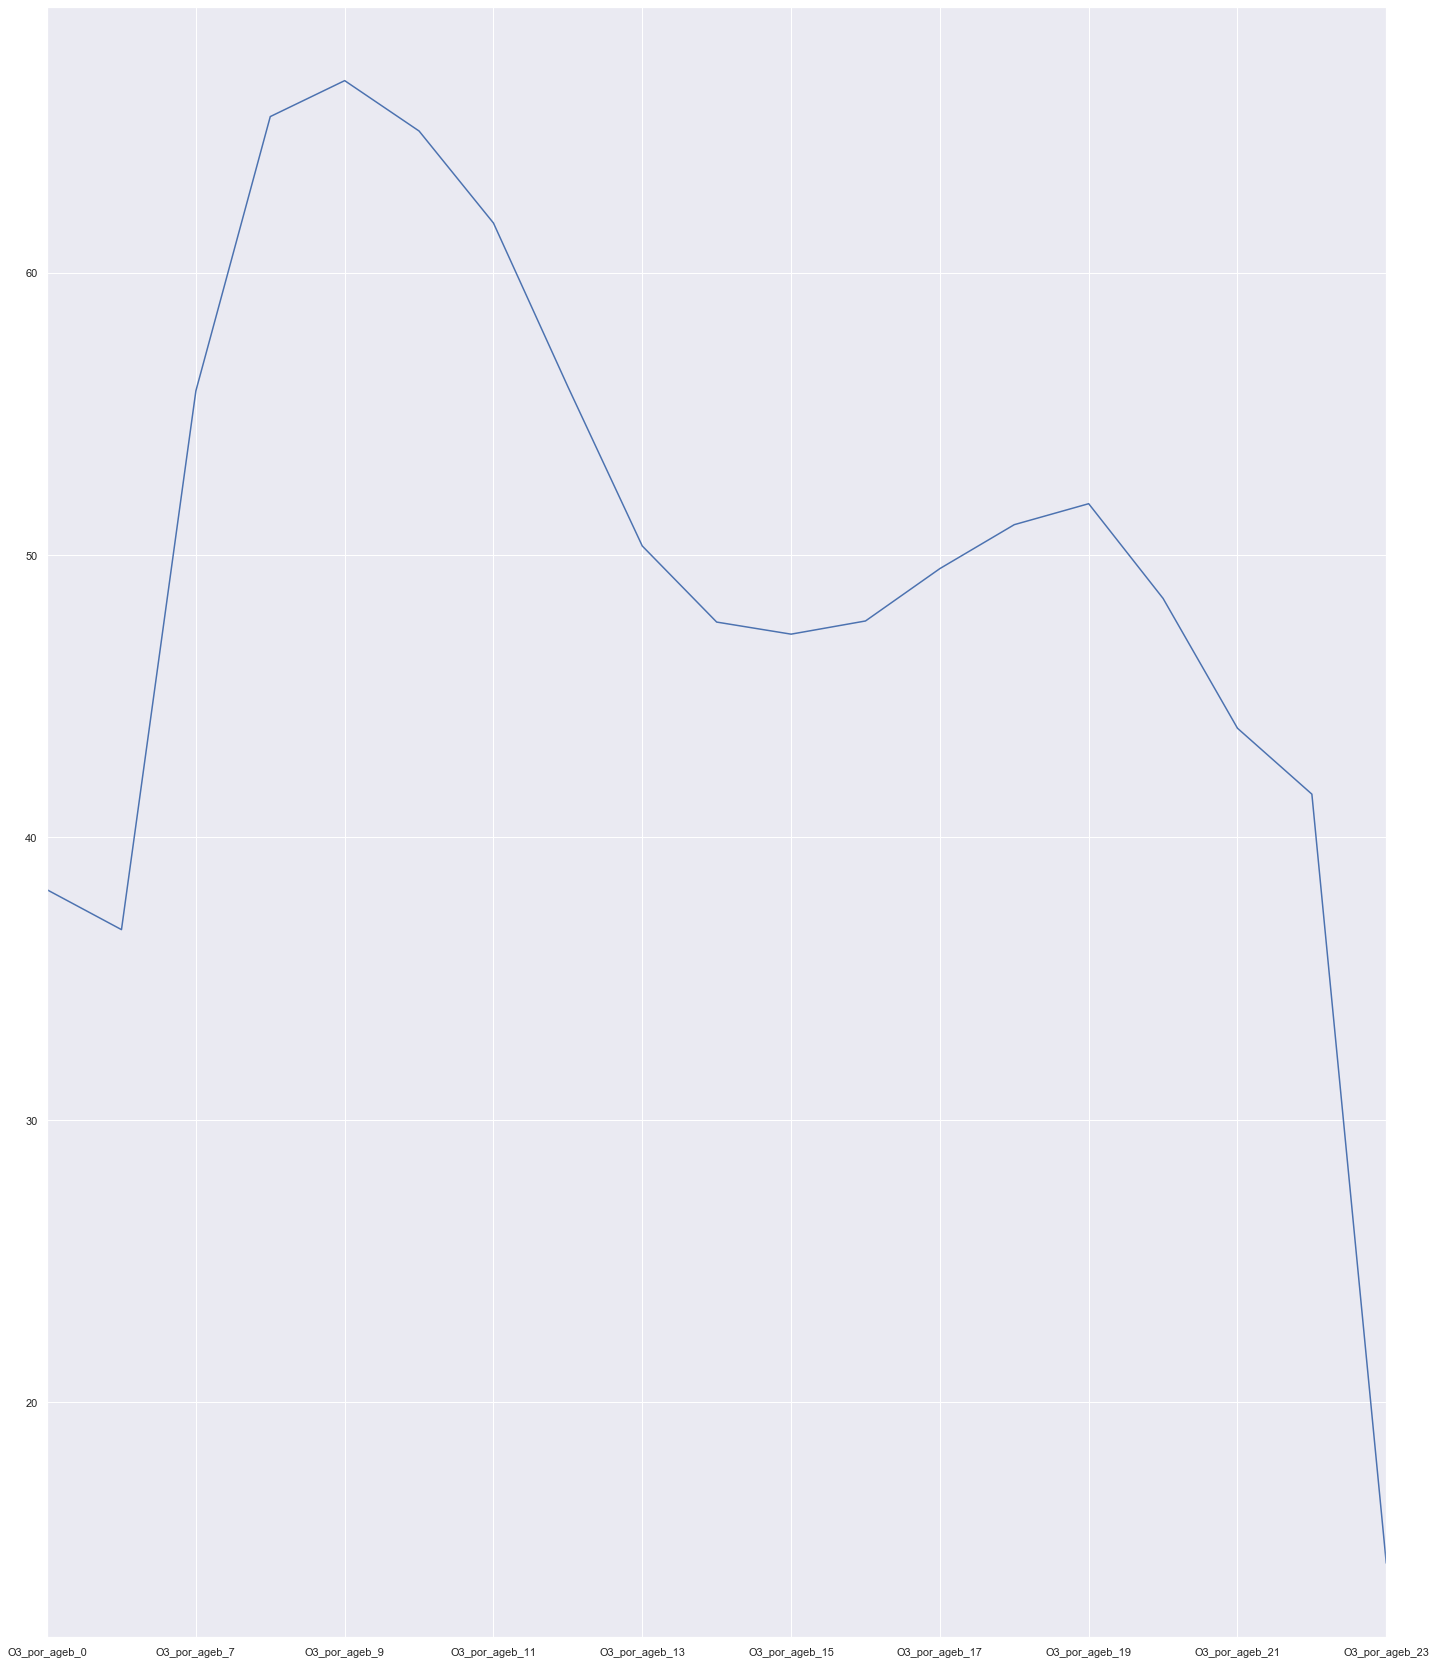

In [116]:
row = df_centroides.iloc[0][3:]
row.plot(kind='line')